### 5/6/20: Moran process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

In [3]:
###Basic moran process, which ran for a specifcied amount of generations
###Faster, but less extendable version used for initial assignment, for well-mixed population
def moran_process(t, ## total number of time steps or moran steps if moran steps true
                  K, #pop_size
                  f_0, #init
                  r, #mutant fitness
                  moran_steps='True'): #will take func input t as generation time  each with 1/K steps
    if moran_steps:
        t=t*K
    fits = np.array([1,r])
    init = np.array([f_0,(1-f_0)],dtype=np.float64)*K
    history = np.zeros((t,2),dtype=np.int64)
    history[0] = init
    dx = np.array([[1,-1],[0,0],[-1,1]])
    dt=0
    P_mat=np.zeros(3,dtype=np.float64)
    while np.diff(history[dt])<K and dt< t-1:
        dt+=1
        history[dt] = history[dt-1]
        P_mat[0] =(1*np.product(history[dt])) / (np.dot(fits, history[dt])*K)
        P_mat[2]=(r*np.product(history[dt])) / (np.dot(fits, history[dt])*K)
        P_mat[1]=1-P_mat[2]-P_mat[0]
        
        history[dt]+=dx[np.random.choice(np.arange(3),p=P_mat)]
        



    if np.diff(history[dt])== K:
        history[dt:,np.where(history[dt]==K)[0][0]] = K
    return history
    
    
    

## runs moran process til an allele has fixed
def moran_process_fixtime(K, #pop_size
                  f_0, #init
                  r, #mutant fitness
                         ): #will take func input t as generation time  each with 1/K steps

    fits = np.array([1,r])
    count = np.array([f_0,(1-f_0)],dtype=np.float64)*K
    dx = np.array([[1,-1],[0,0],[-1,1]])
    dt=0
    P_mat=np.zeros(3,dtype=np.float64)
    while abs(np.diff(count))<K:
        dt+=1

        P_mat[0] =(1*np.product(count)) / (np.dot(fits, count)*K)
        P_mat[2]=(r*np.product(count)) / (np.dot(fits, count)*K)
        P_mat[1]=1-P_mat[2]-P_mat[0]
        
        count+=dx[np.random.choice(np.arange(3),p=P_mat)]
        


    return dt,count

    


## runs moran process til an allele has fixed
def moran_process_one_mut(K, #pop_size
                  r, #mutant fitness
                         ): #will take func input t as generation time  each with 1/K steps

    fits = np.array([1,r])
    count = np.array([K-1,1],dtype=np.float64)
    dx = np.array([[1,-1],[0,0],[-1,1]])
    dt=0
    P_mat=np.zeros(3,dtype=np.float64)
    while (count[1]!=0) & (count[1]!=K):
        dt+=1

        P_mat[0] =(1*np.product(count)) / (np.dot(fits, count)*K)
        P_mat[2]=(r*np.product(count)) / (np.dot(fits, count)*K)
        P_mat[1]=1-P_mat[2]-P_mat[0]
        
        count+=dx[np.random.choice(np.arange(3),p=P_mat)]
        


    return dt,count

    

    



    




In [ ]:
###generalizable functions, that 'manually selects' individuals
##will be used later on
def moran_process_gen(t, ## total number of time steps
                  K, #pop_size
                  f_0, #init
                  r): #mutant fitness
    norm_fit = np.array([1,r])/ (1+r)
    P_mat[1,::-1] = np.array([1,r])/ (1+r)
    init = np.array([f_0,(1-f_0)],dtype=np.float64)*K
    history = np.zeros((t,2),dtype=np.int64)
    history[0] = init
    dx = np.array([0,0])
    alleles = np.arange(2)
    dt=0

    while np.diff(history[dt])<K and dt< t-1:
        dt+=1

        history[dt] = history[dt-1]

        b_choice = np.random.choice(alleles,p= norm_fit*(history[dt]/K)/np.sum(norm_fit*(history[dt]/K)))
        d_choice = np.random.choice(alleles,p=history[dt]/K)
        history[dt][b_choice]+=1
        history[dt][d_choice]-=1


    if np.diff(history[dt])== K:
        history[dt:,np.where(history[dt]==K)[0][0]] = K
    return history
    

    

CPU times: user 22.5 s, sys: 1.91 s, total: 24.4 s
Wall time: 27.1 s


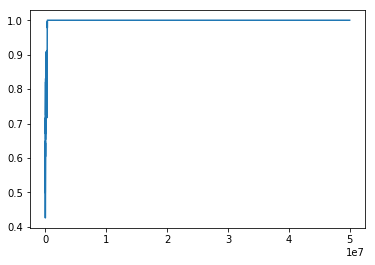

In [386]:
%%time
t=50000
K=1000
r=1
f_0= .5
plt.plot(moran_process(t,K,f_0,r)[:,1]/K)

In [646]:
#generate data
t=5000 # total time steps
K_space = np.array([100,1000]) #pop sizes. to iterate over
r_space = np.array([1.1,1.5,2]) #mut fit to iterate over
samp = 50 # sample num
results = np.zeros((len(K_space),len(r_space),samp,t)) # array to store results
for i,K in enumerate(K_space):
    for j, r in  enumerate(r_space):
        for n in range(samp):
            #4D array storing mutant B frequency over each time step, for each sample number, pop size and mut rate
            results[i,j,n,:]=moran_process(t,K,f_0,r)[:,1]/K  #a single simulation over t time steps is run by function 'moran_process'

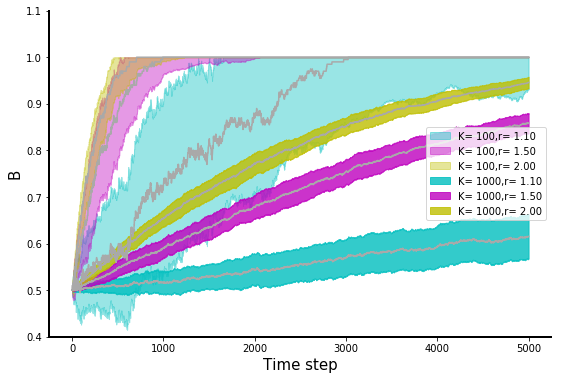

In [647]:
#Graphing
fig,ax= plt.subplots(figsize= (9,6))
#colors to distuingsh r values
col=['c','m','y']
#alpha values to distinguish Ks
a =[.4,.8]     

#iterate back over array 4d results array
#storing mutant B frequency over each time step, for each sample number, pop size and mut rate
for i,K in enumerate(K_space):
    for j, r in  enumerate(r_space):

        # median of data over all samples for each condition
        y = np.median(np.array(results[i,j]),axis=0)[:-1]
        yerr =np.std(np.array(results[i,j]),axis=0)[:-1]
        ax.plot(np.arange(t)[:-1],y,color = 'darkgrey')
        # error env. from standard deviation
        ax.fill_between(np.arange(t)[:-1], y-yerr, [min(ye,1) for ye in y+yerr],alpha=a[i],color = col[j],label='K= %d,r= %0.2f'% (K, r)) 

ax.legend()
ax.set_ylabel('B',fontsize=15)
ax.set_xlabel('Time step',fontsize=15)
ax.set_ylim([.4,1.1])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

    

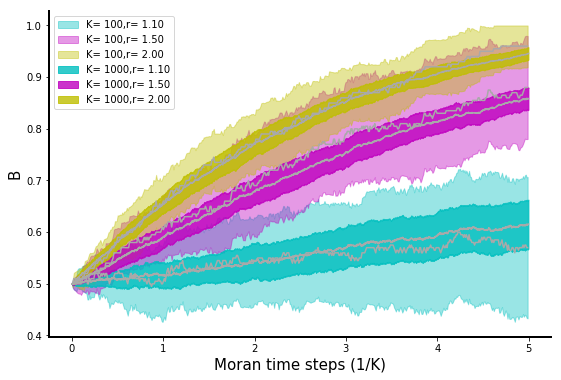

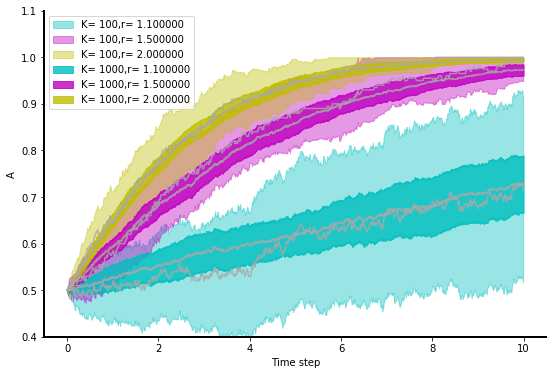

In [650]:
# Scaled x-axis by 1/N, 
fig,ax= plt.subplots(figsize= (9,6))

T=10
f_0=.5
r=.9
df= pd.DataFrame(columns=['t','f'])

col=['c','m','y']
a =[.4,.8]     
arr=[]

for i,K in enumerate([100,1000]):
    for j, r in  enumerate([1.1,1.5,2]):
        arr =[]
        for n in range(50):

            arr.append(moran_process(T,K,f_0,r,True)[:,1]/K)

        y = np.median(np.array(arr),axis=0)[:-1]
        yerr =np.std(arr,axis=0)[:-1]
        t_space = np.linspace(0,T,K*T)
        ax.plot((t_space)[:-1],y,color = 'darkgrey',alpha=.8)
        ax.fill_between(t_space[:-1], y-yerr, [min(ye,1) for ye in y+yerr],alpha=a[i],color = col[j],label='K= %d,r= %2f'% (K, r)) 

ax.legend()
ax.set_ylabel('B',fontsize=15)
ax.set_xlabel('Moran time steps (1/K)',fontsize=15)
ax.set_ylim([.4,1.1])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

    

### 5/6/20: Moran process: time fixation

In [10]:
dt = moran_process_fixtime(100,.5,.9)

In [105]:
#generate data
f_0=.5
K_space = np.array([10,100,1000]) #pop sizes. to iterate over
r_space = np.array([1.1,1.4,1.7,2]) #mut fit to iterate over
samp = 50 # sample num
results = np.zeros((len(K_space),len(r_space),samp)) # array to store results
df=pd.DataFrame(columns=['K','r','t'])
for i,K in enumerate(K_space):
    for j, r in  enumerate(r_space):
        for n in range(samp):
            #4D array storing mutant B frequency over each time step, for each sample number, pop size and mut rate
            df = df.append(pd.DataFrame(np.array([[K],[r],[moran_process_fixtime(K,f_0,r)[0]]]).T,columns=['K','r','t']))  #a single simulation over t time steps is run by function 'moran_process'

In [106]:
df=df.astype(float)

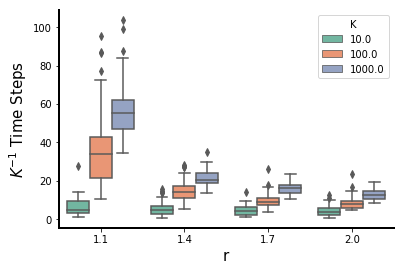

In [107]:
fig,ax=plt.subplots()


sns.boxplot(x='r',y=df['t']/df['K'],data=df,hue='K',ax=ax,palette="Set2")


ax.set_xlabel('r',fontsize=15)
ax.set_ylabel('$K^{-1}$ Time Steps',fontsize=15)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
plt.savefig('NK_2.pdf')


## 5/20 Frean et al. Figure 3

In [ ]:
t_b =  lambda r,i, N: (r* (N-i)*i)/ ((r*i +N-1)*N)
t_d = lambda r,i, N: ( (N-i)*i)/ ((r*i +N-1)*N)
t_n =lambda r,i, N: 1 - t_b(r,i,N)- t_d(r,i,N)
fix_prob = lambda r,l,N: (1-r**-1) / (1-r**-N)


##this doesnt work
def tau(r,l,N):
    outer = 0
    middle= 0 
    inner =1
    for k in range (1,N-1):
        for l in range(1,k):
            for m in range(l+1,k):
                inner*=t_d(r,m,N)/t_b(r,m,N)
            middle+=(fix_prob(r, l, N)/ t_b(r,l,N))*inner
        outer+=middle
        
    return outer
    
    

In [7]:
r_range = np.linspace(1,5,21)
samp = 1000
K=50
df_a=pd.DataFrame(columns=['r','fix_prob'])
for r in r_range:
    cnt=0
    for n in range(samp):
        cnt+=moran_process_one_mut(K,r)[1][1]/K
    df_a=df_a.append(pd.DataFrame(np.array([[r],[cnt/n]]).T,columns=['r','fix_prob']),ignore_index=True)
    

In [8]:
r = 1.1
samp= 1000
K_range=np.linspace(5,100,20)
df_b=pd.DataFrame(columns=['K','fix_prob'])
for K in K_range:
    cnt=0
    for n in range(samp):
        cnt+=moran_process_one_mut(K,r)[1][1]/K
    df_b=df_b.append(pd.DataFrame(np.array([[K],[cnt/n]]).T,columns=['K','fix_prob']),ignore_index=True)
    

In [9]:
K = 50
samp = 1000
r_range = np.linspace(1,5,21)
df_c=pd.DataFrame(columns=['r','fix_time'])
for r in r_range:
    for n in range(samp):
        T,count = moran_process_fixtime(K,((K-1)/K),r)
        if count[1]==K:

            df_c=df_c.append(pd.DataFrame(np.array([[r],[T]]).T,columns=['r','fix_time']),ignore_index=True)
    

In [10]:
r=1.1
samp= 1000
K_range=np.linspace(5,100,20)
df_d=pd.DataFrame(columns=['K','fix_time'])
for K in K_range:
    for n in range(samp):
        T,count = moran_process_fixtime(K,((K-1)/K),r)
        if count[1]==K:

            df_d=df_d.append(pd.DataFrame(np.array([[K],[T]]).T,columns=['K','fix_time']),ignore_index=True)
    

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Text(0.5,0.93,'Moran process, well-mixed population, 1000 realizations')

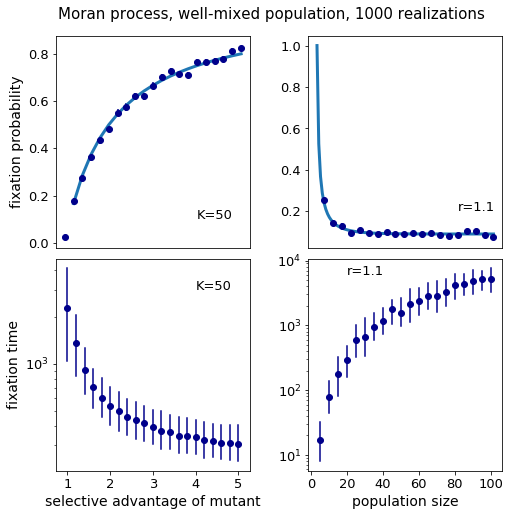

In [93]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
r_range = np.linspace(1,5,21)
K=50
col='darkblue'
label_size=14

axs[0,0].errorbar(r_range,df_a['fix_prob'],yerr=((df_a['fix_prob']*(1-df_a['fix_prob']))/1000)**.5, fmt='o',color=col,ecolor=col)
axs[0,0].plot(np.linspace(1,5,21), [fix_prob(r,1,50) for r in (np.linspace(1,5,21))],lw=3  )
axs[0,1].errorbar(K_range,df_b['fix_prob'],yerr=((df_b['fix_prob']*(1-df_b['fix_prob']))/1000)**.5, fmt='o',color=col,ecolor=col)
axs[0,1].plot(np.linspace(1,100,101),[fix_prob(1.1,1,k) for k in np.linspace(1,100,101)],lw=3  )
sns.lineplot(x='r',y='fix_time',data=df_c,ax=axs[1,0],ci='sd',color=col,err_style="bars",lw=0)
axs[1,0].scatter(r_range,df_c.groupby('r').median()['fix_time'],color=col)


sns.lineplot(x='K',y='fix_time',data=df_d,ax=axs[1,1],ci='sd',err_style="bars",color=col,lw=0)
axs[1,1].scatter(K_range,df_d.groupby('K').median()['fix_time'],color=col)


for ax in [axs[1,0],axs[1,1]]:
    ax.set_yscale('log')
    
for ax in [axs[0,0],axs[0,1]]:
    ax.set_xticks([])
    ax.set_xlabel('')
    #ax.set_ylim([0.0,0.8])
    
for ax in [axs[0,1],axs[1,1]]:

    ax.set_ylabel('')
    
axs[0,0].set_ylabel('fixation probability',fontsize=label_size)
axs[1,0].set_ylabel('fixation time',fontsize=label_size)
axs[1,0].set_xlabel('selective advantage of mutant',fontsize=label_size)
axs[1,1].set_xlabel('population size',fontsize=label_size)


plt.tick_params(axis='both', which='minor', labelsize=13)

axs[1,0].set_xticks([1,2,3,4,5])
axs[1,1].set_xticks(np.arange(0,120,20))

axs[0,0].yaxis.set_tick_params(labelsize=13)
axs[0,1].yaxis.set_tick_params(labelsize=13)
axs[1,0].xaxis.set_tick_params(labelsize=13)
axs[1,0].yaxis.set_tick_params(labelsize=13)
axs[1,1].xaxis.set_tick_params(labelsize=13)
axs[1,1].yaxis.set_tick_params(labelsize=13)
plt.subplots_adjust(hspace=.05)
plt.subplots_adjust(wspace=.3)

axs[0,0].text(4,.1,'K=50',fontsize=13)
axs[0,1].text(80,.2,'r=1.1',fontsize=13)
axs[1,0].text(4,3000,'K=50',fontsize=13)
axs[1,1].text(20,6000,'r=1.1',fontsize=13)
fig.suptitle('Moran process, well-mixed population, 1000 realizations',y=.93,fontsize=15)
#plt.savefig('NK_4.pdf')